In [172]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D

from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils

import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import preprocessing
from past.builtins import xrange

import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose

In [173]:
# image specification
img_rows,img_cols=28,28

x_tr = []
lable=[]

In [174]:
#only for count
listing = os.listdir('DATASET3/')
cou=0
for vid in listing:
    listing2 = os.listdir('DATASET3/'+vid)
    for vid2 in listing2:
        cou +=1
print(cou)

19748


In [175]:
counter =0
listing = os.listdir('dataset3/') #main dataset directory name
for vid in listing:
    print(vid)
    counter2=0
    listing2 = os.listdir('dataset3/'+vid)
    for vid2 in listing2:
        img_array = cv2.imread('dataset3/'+vid+'/'+vid2)  # convert to array
        image = cv2.resize(img_array,(img_rows,img_cols))
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        x_tr.append(image)
        lable.append(counter)
        counter2 +=1
        if counter2 >=1000:
            break
    counter +=1
    x_count.append([counter,int(vid)])

51
52
53
54
55
56
57
58
59
60


In [179]:
train_data = np.asarray(x_tr)
train_label = np.asarray(lable)

print(train_data[0].shape)
data = train_data[:,:,:,0]



print(data.shape)
print(data[0].shape)
print(train_label[0])



(28, 28, 3)
(10000, 28, 28)
(28, 28)
0


10000


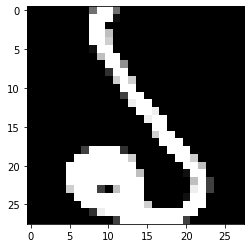

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

print(len(train_data))
#img_norm = denorm(train)
plt.imshow(data[1000], cmap='gray')

In [178]:
def data_structure(image, target):
    dataset = image, target
    return dataset

In [183]:
dataset = data_structure(data, train_label)

print(dataset[0])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [209]:
import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import MNIST

mnist = torch.tensor(data)



Label:  0
[[  0   0   0   0   0   0   0   0 205 255 255 255 250 205   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  47 255 255 255 255 255 255 255 255 118   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4 255 255 255 255 250 252 255 255 255 255 255 224
    1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255   0   0   0   0  67 255 255 255 255
  255 222 159   0   0   0   0   0   0   0]
 [  0   0   0   0 104 255 255 255  86   0   0   0   0   0   0 196 255 255
  255 255 255 146   0   0   0   0   0   0]
 [  0   0   0   0 255 255 255 243   0   0   0   0   0   0   0   0  21 255
  255 255 255 255 248   0   0   0   0   0]
 [  0   0   0  71 255 255 255   0   0   0   0   0   0   0   0   0   0  18
  255 255 255 255 255 255   0   0   0   0]
 [  0   0   0 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0
    0 255 255 255 255 255   9   0   0   0]
 [  0   0   3 255 255 255 180   0   0   0   0   0   0 

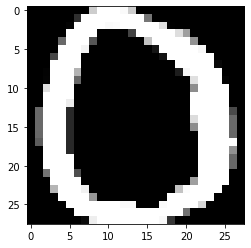

In [210]:
img, label = data[0], train_label[0]

print('Label: ', label)
print(img)
plt.imshow(img, cmap='gray')
#torch.min(img), torch.max(img)
print(img.shape)
print(mnist.shape)

In [211]:
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

10000
1
(28, 28, 3)


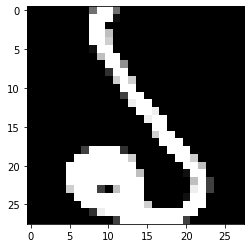

In [214]:
import matplotlib.pyplot as plt
%matplotlib inline

print(len(train_data))
img_norm = denorm(train)
plt.imshow(train_data[1000], cmap='gray')
print(train_label[1200])
print(train_data[0].shape)


In [215]:
from torch.utils.data import DataLoader

batch_size = 100
data_loader = DataLoader(dataset, batch_size, shuffle=True)

In [217]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [218]:
image_size = 784
hidden_size = 256

In [56]:
from torchvision.transforms import ToTensor, Normalize, Compose

transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))])

transform(train_data[0])

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]])

In [110]:
print(train_data[:,10:15,10:15])
img = torch.tensor(train_data[0])
from torchvision.transforms import ToTensor, Normalize, Compose

transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))])
print(train_data.shape)
t = train_data[:, :,:, 0]
print(t.shape)
train=transform(t)
torch.min(train), torch.max(train)
print(train.shape)

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 ...


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0

In [111]:
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

Label: 0


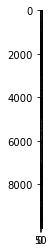

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

#img_norm = denorm(train)
plt.imshow(img_norm[0], cmap='gray')
print('Label:', train_label[0])

In [235]:
def data_structure(image1, image2):
    dataset = image1, image2
    return dataset

In [236]:
dataset = data_structure(train_data, train_data)

In [237]:
from torch.utils.data import DataLoader

batch_size = 100
data_loader = DataLoader(dataset, batch_size, shuffle=True)

In [238]:
import torch.nn as nn

D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

In [239]:
D.to(device);

In [240]:
latent_size = 64

In [241]:
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())

In [242]:
y = G(torch.randn(2, latent_size))
gen_imgs = denorm(y.reshape((-1, 28,28)).detach())

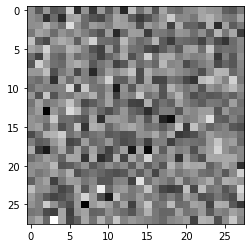

In [243]:
plt.imshow(gen_imgs[0], cmap='gray');

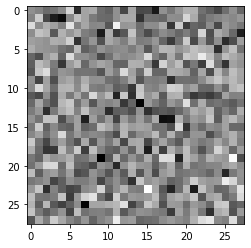

In [244]:
plt.imshow(gen_imgs[1], cmap='gray');

In [245]:
G.to(device);

In [246]:
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)

In [247]:
def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

def train_discriminator(images):
    # Create the labels which are later used as input for the BCE loss
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)
        
    # Loss for real images
    outputs = D(images)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Loss for fake images
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Combine losses
    d_loss = d_loss_real + d_loss_fake
    # Reset gradients
    reset_grad()
    # Compute gradients
    d_loss.backward()
    # Adjust the parameters using backprop
    d_optimizer.step()
    
    return d_loss, real_score, fake_score

In [248]:
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

In [249]:
def train_generator():
    # Generate fake images and calculate loss
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    labels = torch.ones(batch_size, 1).to(device)
    g_loss = criterion(D(fake_images), labels)

    # Backprop and optimize
    reset_grad()
    g_loss.backward()
    g_optimizer.step()
    return g_loss, fake_images

In [250]:
import os

sample_dir = 'SAMPLES'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

In [251]:
from IPython.display import Image
from torchvision.utils import save_image

# Save some real images
for images, _ in data_loader:
    images = images.reshape(images.size(0), 1, 28, 28)
    save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'), nrow=10)
    break
   
Image(os.path.join(sample_dir, 'real_images.png'))

RuntimeError: shape '[10000, 1, 28, 28]' is invalid for input of size 23520000